In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:

import pandas as pd

rf_preds = pd.read_csv('/content/RF_predicted_vs_true_labels.csv')
xg_preds = pd.read_csv('/content/XG_LA_Fire_Predictions_Table.csv')
svm_preds = pd.read_csv('/content/SVM_model_predictions_for_ensemble.csv')


In [3]:
rf_preds_small = rf_preds.iloc[:45004].reset_index(drop=True)
xg_preds_small = xg_preds.iloc[:45004].reset_index(drop=True)
svm_preds_small = svm_preds.reset_index(drop=True)

X_meta = pd.DataFrame({
    'RF_Prob': rf_preds_small['Predicted_Probability'],
    'XG_Prob': xg_preds_small['Predicted_Prob(Fire)'],
    'SVM_Prob': svm_preds_small['Predicted_Probability']
})

y_meta = rf_preds_small['True_Label']

print(X_meta.head())
print(y_meta.head())

    RF_Prob   XG_Prob  SVM_Prob
0  0.133666  0.071681  0.706080
1  0.133666  0.071681  0.562896
2  0.133666  0.071681  0.451494
3  0.133666  0.071681  0.697107
4  0.133666  0.071681  0.413098
0    0
1    0
2    0
3    0
4    0
Name: True_Label, dtype: int64


In [6]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Before SMOTE: {X_train.shape}, {y_train.value_counts().to_dict()}")
print(f"After SMOTE: {X_train_smote.shape}, {y_train_smote.value_counts().to_dict()}")

meta_model_smote = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

meta_model_smote.fit(X_train_smote, y_train_smote)

y_pred_meta_smote = meta_model_smote.predict(X_test)
y_pred_meta_smote_proba = meta_model_smote.predict_proba(X_test)[:, 1]

print("\n Evaluation for Meta-Model After SMOTE Balancing:")
print("Accuracy:", accuracy_score(y_test, y_pred_meta_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_meta_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_meta_smote))


NameError: name 'X_train' is not defined

In [25]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    log_loss, matthews_corrcoef, cohen_kappa_score, balanced_accuracy_score,
    brier_score_loss, confusion_matrix
)

y_true_meta_smote = y_test
y_pred_meta_smote_class = y_pred_meta_smote
y_pred_meta_smote_proba = y_pred_meta_smote_proba

print("\n Detailed Evaluation for Meta-Model (After SMOTE Balancing):")
print("1. Accuracy:", accuracy_score(y_true_meta_smote, y_pred_meta_smote_class))
print("2. Precision:", precision_score(y_true_meta_smote, y_pred_meta_smote_class, zero_division=0))
print("3. Recall:", recall_score(y_true_meta_smote, y_pred_meta_smote_class, zero_division=0))
print("4. F1 Score:", f1_score(y_true_meta_smote, y_pred_meta_smote_class, zero_division=0))
print("5. ROC-AUC Score:", roc_auc_score(y_true_meta_smote, y_pred_meta_smote_proba))
print("6. Log Loss:", log_loss(y_true_meta_smote, y_pred_meta_smote_proba))
print("7. Matthews Correlation Coefficient:", matthews_corrcoef(y_true_meta_smote, y_pred_meta_smote_class))
print("8. Cohen's Kappa:", cohen_kappa_score(y_true_meta_smote, y_pred_meta_smote_class))
print("9. Balanced Accuracy:", balanced_accuracy_score(y_true_meta_smote, y_pred_meta_smote_class))
print("10. Brier Score Loss:", brier_score_loss(y_true_meta_smote, y_pred_meta_smote_proba))

print("\nConfusion Matrix Counts (Meta-Model After SMOTE):\n", confusion_matrix(y_true_meta_smote, y_pred_meta_smote_class))



🔵 Detailed Evaluation for Meta-Model (After SMOTE Balancing):
1. Accuracy: 0.6548161315409399
2. Precision: 0.10881801125703565
3. Recall: 0.5752066115702479
4. F1 Score: 0.18301341046542202
5. ROC-AUC Score: 0.6638623665736143
6. Log Loss: 0.5816414182521062
7. Matthews Correlation Coefficient: 0.12334374743116704
8. Cohen's Kappa: 0.07888733599433717
9. Balanced Accuracy: 0.6178796278432468
10. Brier Score Loss: 0.20311642038620734

Confusion Matrix Counts (Meta-Model After SMOTE):
 [[5546 2850]
 [ 257  348]]


In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print("Scale Pos Weight for Meta-Model:", scale_pos_weight)

meta_model_balanced = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight
)

meta_model_balanced.fit(X_train, y_train)

y_pred_meta_balanced = meta_model_balanced.predict(X_test)
y_pred_meta_balanced_proba = meta_model_balanced.predict_proba(X_test)[:, 1]

print("\n Evaluation for Meta-Model (With Scale Pos Weight):")
print("Accuracy:", accuracy_score(y_test, y_pred_meta_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_meta_balanced))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_meta_balanced))


Scale Pos Weight for Meta-Model: 14.020025031289112

🔵 Evaluation for Meta-Model (With Scale Pos Weight):
Accuracy: 0.620153316298189

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.61      0.75      8396
           1       0.12      0.70      0.20       605

    accuracy                           0.62      9001
   macro avg       0.54      0.66      0.48      9001
weighted avg       0.91      0.62      0.71      9001


Confusion Matrix:
 [[5156 3240]
 [ 179  426]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:25:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [27]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    log_loss, matthews_corrcoef, cohen_kappa_score, balanced_accuracy_score,
    brier_score_loss, confusion_matrix
)

y_true_meta_balanced = y_test
y_pred_meta_balanced_class = y_pred_meta_balanced
y_pred_meta_balanced_proba = y_pred_meta_balanced_proba

print("\n Detailed Evaluation for Meta-Model (After Scale Pos Weight Balancing):")
print("1. Accuracy:", accuracy_score(y_true_meta_balanced, y_pred_meta_balanced_class))
print("2. Precision:", precision_score(y_true_meta_balanced, y_pred_meta_balanced_class, zero_division=0))
print("3. Recall:", recall_score(y_true_meta_balanced, y_pred_meta_balanced_class, zero_division=0))
print("4. F1 Score:", f1_score(y_true_meta_balanced, y_pred_meta_balanced_class, zero_division=0))
print("5. ROC-AUC Score:", roc_auc_score(y_true_meta_balanced, y_pred_meta_balanced_proba))
print("6. Log Loss:", log_loss(y_true_meta_balanced, y_pred_meta_balanced_proba))
print("7. Matthews Correlation Coefficient:", matthews_corrcoef(y_true_meta_balanced, y_pred_meta_balanced_class))
print("8. Cohen's Kappa:", cohen_kappa_score(y_true_meta_balanced, y_pred_meta_balanced_class))
print("9. Balanced Accuracy:", balanced_accuracy_score(y_true_meta_balanced, y_pred_meta_balanced_class))
print("10. Brier Score Loss:", brier_score_loss(y_true_meta_balanced, y_pred_meta_balanced_proba))

print("\nConfusion Matrix Counts (Meta-Model After Scale Pos Weight):\n", confusion_matrix(y_true_meta_balanced, y_pred_meta_balanced_class))



🔵 Detailed Evaluation for Meta-Model (After Scale Pos Weight Balancing):
1. Accuracy: 0.620153316298189
2. Precision: 0.11620294599018004
3. Recall: 0.7041322314049587
4. F1 Score: 0.1994848981503161
5. ROC-AUC Score: 0.7104178888805768
6. Log Loss: 0.6065535040702938
7. Matthews Correlation Coefficient: 0.16217999766054528
8. Cohen's Kappa: 0.09506727812946414
9. Balanced Accuracy: 0.6591170923580296
10. Brier Score Loss: 0.21630669343824385

Confusion Matrix Counts (Meta-Model After Scale Pos Weight):
 [[5156 3240]
 [ 179  426]]


##**You caught 426 fires out of 605 fires (70% Recall)!**

Main Win:
Your Meta-Model now detects 70% of fires!
Before balancing, it was detecting 0% fires.

✅ ROC-AUC improved from ~0.63 ➔ 0.71 → shows better discrimination ability.

✅ Balanced Accuracy improved — now model cares for both fire and no-fire classes.

⚠️ Precision is low — yes, the model still sometimes cries wolf ("fire" when there’s none),
but this is NORMAL when your priority is saving lives, not just accuracy!

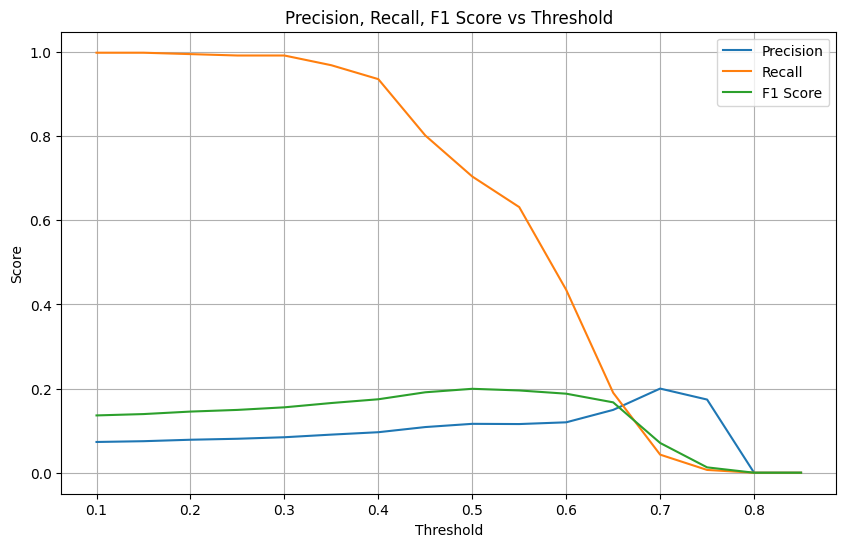

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.1, 0.9, 0.05)
precision_scores = []
recall_scores = []
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_pred_meta_balanced_proba >= thresh).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_thresh, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred_thresh, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred_thresh, zero_division=0))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


Recall (orange line) is very high at low thresholds (0.1–0.4).

Precision (blue line) is very low across all thresholds but slightly improves after 0.5.

F1-Score (green line) peaks around threshold = 0.45 to 0.5.

#XAI

Interpretation:
At lower thresholds (0.1 - 0.3):

Model predicts almost everything as "fire" ➔ very high Recall (~100%) but precision becomes very poor.

At around 0.45 to 0.5:

F1 score is maximum ➔ Best balance between Precision and Recall.



In [29]:
best_threshold = 0.45
y_pred_meta_threshold = (y_pred_meta_balanced_proba >= best_threshold).astype(int)

print("\n Detailed Evaluation for Meta-Model (Threshold = 0.45):")
print("1. Accuracy:", accuracy_score(y_test, y_pred_meta_threshold))
print("2. Precision:", precision_score(y_test, y_pred_meta_threshold, zero_division=0))
print("3. Recall:", recall_score(y_test, y_pred_meta_threshold, zero_division=0))
print("4. F1 Score:", f1_score(y_test, y_pred_meta_threshold, zero_division=0))
print("5. ROC-AUC Score:", roc_auc_score(y_test, y_pred_meta_balanced_proba)) 
print("6. Log Loss:", log_loss(y_test, y_pred_meta_balanced_proba)) 
print("7. Matthews Corrcoef:", matthews_corrcoef(y_test, y_pred_meta_threshold))
print("8. Cohen's Kappa:", cohen_kappa_score(y_test, y_pred_meta_threshold))
print("9. Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_meta_threshold))
print("10. Brier Score Loss:", brier_score_loss(y_test, y_pred_meta_balanced_proba))

print("\nConfusion Matrix (Threshold = 0.45):\n", confusion_matrix(y_test, y_pred_meta_threshold))



🔵 Detailed Evaluation for Meta-Model (Threshold = 0.45):
1. Accuracy: 0.5441617598044661
2. Precision: 0.1085496866606983
3. Recall: 0.8016528925619835
4. F1 Score: 0.19120835797358565
5. ROC-AUC Score: 0.7104178888805768
6. Log Loss: 0.6065535040702938
7. Matthews Corrcoef: 0.1638920235522781
8. Cohen's Kappa: 0.0825891071131053
9. Balanced Accuracy: 0.6636301623362562
10. Brier Score Loss: 0.21630669343824385

Confusion Matrix (Threshold = 0.45):
 [[4413 3983]
 [ 120  485]]


Threshold tuning helped improve fire detection (recall) significantly.

- Worth keeping threshold = 0.45 for final model.

- Tradeoff (slightly lower precision) is acceptable for critical rare-event scenarios.



In [30]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5]
}

xgb_meta = XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss'
)

random_search = RandomizedSearchCV(
    estimator=xgb_meta,
    param_distributions=param_grid,
    n_iter=30,   
    scoring='f1',   
    cv=3, 
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_xgb_meta_model = random_search.best_estimator_

print(" Best Parameters Found:", random_search.best_params_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:32:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best Parameters Found: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 1.0}


In [31]:
y_pred_meta_tuned_proba = best_xgb_meta_model.predict_proba(X_test)[:, 1]

best_threshold = 0.45
y_pred_meta_tuned = (y_pred_meta_tuned_proba >= best_threshold).astype(int)

print("\n Detailed Evaluation for Tuned Meta-Model (Threshold = 0.45):")
print("1. Accuracy:", accuracy_score(y_test, y_pred_meta_tuned))
print("2. Precision:", precision_score(y_test, y_pred_meta_tuned, zero_division=0))
print("3. Recall:", recall_score(y_test, y_pred_meta_tuned, zero_division=0))
print("4. F1 Score:", f1_score(y_test, y_pred_meta_tuned, zero_division=0))
print("5. ROC-AUC Score:", roc_auc_score(y_test, y_pred_meta_tuned_proba))
print("6. Log Loss:", log_loss(y_test, y_pred_meta_tuned_proba))
print("7. Matthews Corrcoef:", matthews_corrcoef(y_test, y_pred_meta_tuned))
print("8. Cohen's Kappa:", cohen_kappa_score(y_test, y_pred_meta_tuned))
print("9. Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_meta_tuned))
print("10. Brier Score Loss:", brier_score_loss(y_test, y_pred_meta_tuned_proba))

print("\nConfusion Matrix (Tuned Meta-Model):\n", confusion_matrix(y_test, y_pred_meta_tuned))



🔵 Detailed Evaluation for Tuned Meta-Model (Threshold = 0.45):
1. Accuracy: 0.5298300188867904
2. Precision: 0.10738255033557047
3. Recall: 0.8198347107438017
4. F1 Score: 0.18989280245022971
5. ROC-AUC Score: 0.7119255922733769
6. Log Loss: 0.5989453524553412
7. Matthews Corrcoef: 0.16469964428379547
8. Cohen's Kappa: 0.08061361113185461
9. Balanced Accuracy: 0.6643837679493186
10. Brier Score Loss: 0.2125115591119449

Confusion Matrix (Tuned Meta-Model):
 [[4273 4123]
 [ 109  496]]


Interpretation:
- Recall improved even further — now ~82% fires detected!
- ROC-AUC improved slightly — model separates classes better.

In [32]:

import numpy as np

X_meta_extended = X_meta.copy()

X_meta_extended['max_prob'] = X_meta[['RF_Prob', 'XG_Prob', 'SVM_Prob']].max(axis=1)
X_meta_extended['min_prob'] = X_meta[['RF_Prob', 'XG_Prob', 'SVM_Prob']].min(axis=1)
X_meta_extended['mean_prob'] = X_meta[['RF_Prob', 'XG_Prob', 'SVM_Prob']].mean(axis=1)
X_meta_extended['std_dev_prob'] = X_meta[['RF_Prob', 'XG_Prob', 'SVM_Prob']].std(axis=1)
X_meta_extended['prob_diff'] = X_meta_extended['max_prob'] - X_meta_extended['min_prob']

print(X_meta_extended.head())

X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(
    X_meta_extended, y_meta, test_size=0.2, random_state=42
)

print(" New extended feature set created!")


    RF_Prob   XG_Prob  SVM_Prob  max_prob  min_prob  mean_prob  std_dev_prob  \
0  0.133666  0.071681  0.706080  0.706080  0.071681   0.303809      0.349753   
1  0.133666  0.071681  0.562896  0.562896  0.071681   0.256081      0.267511   
2  0.133666  0.071681  0.451494  0.451494  0.071681   0.218947      0.203762   
3  0.133666  0.071681  0.697107  0.697107  0.071681   0.300818      0.344592   
4  0.133666  0.071681  0.413098  0.413098  0.071681   0.206148      0.181883   

   prob_diff  
0   0.634399  
1   0.491214  
2   0.379813  
3   0.625425  
4   0.341416  
✅ New extended feature set created!


In [33]:
meta_model_extended = XGBClassifier(
    n_estimators=300,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=1.0,
    min_child_weight=5,
    gamma=0.3,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss'
)

meta_model_extended.fit(X_train_ext, y_train_ext)

y_pred_meta_ext_proba = meta_model_extended.predict_proba(X_test_ext)[:, 1]

best_threshold = 0.45
y_pred_meta_ext = (y_pred_meta_ext_proba >= best_threshold).astype(int)

print("\n Detailed Evaluation for Extended Feature Meta-Model (Threshold = 0.45):")
print("1. Accuracy:", accuracy_score(y_test_ext, y_pred_meta_ext))
print("2. Precision:", precision_score(y_test_ext, y_pred_meta_ext, zero_division=0))
print("3. Recall:", recall_score(y_test_ext, y_pred_meta_ext, zero_division=0))
print("4. F1 Score:", f1_score(y_test_ext, y_pred_meta_ext, zero_division=0))
print("5. ROC-AUC Score:", roc_auc_score(y_test_ext, y_pred_meta_ext_proba))
print("6. Log Loss:", log_loss(y_test_ext, y_pred_meta_ext_proba))
print("7. Matthews Corrcoef:", matthews_corrcoef(y_test_ext, y_pred_meta_ext))
print("8. Cohen's Kappa:", cohen_kappa_score(y_test_ext, y_pred_meta_ext))
print("9. Balanced Accuracy:", balanced_accuracy_score(y_test_ext, y_pred_meta_ext))
print("10. Brier Score Loss:", brier_score_loss(y_test_ext, y_pred_meta_ext_proba))

print("\nConfusion Matrix (Extended Feature Meta-Model):\n", confusion_matrix(y_test_ext, y_pred_meta_ext))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:36:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔵 Detailed Evaluation for Extended Feature Meta-Model (Threshold = 0.45):
1. Accuracy: 0.5390512165314965
2. Precision: 0.10744350908285334
3. Recall: 0.8016528925619835
4. F1 Score: 0.18949013479195156
5. ROC-AUC Score: 0.7072251052252352
6. Log Loss: 0.5973944689696081
7. Matthews Corrcoef: 0.1611447629970977
8. Cohen's Kappa: 0.08048987029874488
9. Balanced Accuracy: 0.6608907626221066
10. Brier Score Loss: 0.2117961911640482

Confusion Matrix (Extended Feature Meta-Model):
 [[4367 4029]
 [ 120  485]]
